In [23]:
import numpy as np
import pandas as pd
import h5py
import sys
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

In [24]:
t_hor = 5010; #um
lambda_min = 7; #um
lambda_max = 13;
waves = np.linspace(7,12,120)
A_ne = 4.0832;
B_ne = 2.0041;
C_ne = .20646;
D_ne = 3.9928;
E_ne = 3866.92;
A_no = 4.1318;
B_no = 1.8584;
C_no = .21999;
D_no = 2.76773;
E_no = 2962.98;
def retardance(wavelength):
    ne = np.sqrt(A_ne + (B_ne*wavelength**2)/(wavelength**2 - C_ne) + (D_ne*wavelength**2)/(wavelength**2 - E_ne));
    no = np.sqrt(A_no + (B_no*wavelength**2)/(wavelength**2 - C_no) + (D_no*wavelength**2)/(wavelength**2 - E_no)); 
    b = ne - no; 

    retardance = (b*t_hor);
    return retardance

In [25]:
def delta_lambda(lambda_c):
    delta = retardance(lambda_c)
    return(lambda_c**2/(delta*(1 +(lambda_c**2 / (4*delta**2)))))

def find_nearest(a, a0):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    return idx

In [26]:
lambda_c = []
lambda1  = []
lambda2  = []
pixel_c = []
pixel1  = []
pixel2  = [] 
for l in waves:
    size = delta_lambda(l)
    low  = l-size/2
    high = l+size/2
    if low > lambda_min and high < lambda_max:
        lambda_c.append(l)
        lambda1.append(low)
        lambda2.append(high)
        
        pixel_c.append(find_nearest(waves,l))
        pixel1.append(find_nearest(waves,low))
        pixel2.append(find_nearest(waves,high))

In [135]:
wav=list(map(lambda l :1/(l*1.0e-4),lambda_c)) #cm
wavnums=list(map(lambda l :1/(l*1.0e-4),waves)) #cm
ret=list(map(lambda l :(retardance(l))*1.0e-4,lambda_c)) #cm

In [147]:
def model(theta,start,stop,D):
    delta = [2*np.pi*ret[start:stop][i]*wav[start:stop][i] for i in range(len(ret[start:stop]))]
    d = np.array(delta)
    return D*np.cos(2*theta)*np.sin(d) + D*np.sin(2*theta)*np.cos(d)

[390.32143958 390.33942151 390.35740344 ... 426.23135713 426.24933906
 426.26732099]


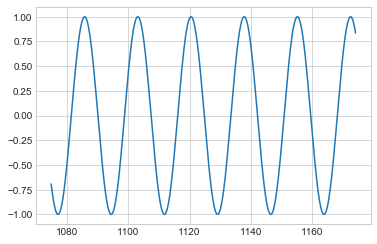

In [150]:
j = 32
start = pixel1[j]
stop = pixel2[j]
#d = [2*np.pi*delta_av*wav[start:stop][i] for i in range(len(ret[start:stop]))]
d = 2*np.pi*delta_av*np.linspace(1075,1174,2000)
print(d)
x = np.linspace(1075,1174,2000)
D = 1
y = D*np.cos(2*np.deg2rad(90))*np.sin(d) + D*np.sin(2*np.deg2rad(90))*np.cos(d)
plt.plot(x,y)
#plt.plot(d,0.47012680856517647*np.sin(d)-0.882524233680272*np.cos(d))
#plt.plot(t_fit,y_fit)

In [153]:
ls = LombScargle(x, y)
frequency,power = LombScargle(x, y).autopower(minimum_frequency=ret[j+4],
                                              maximum_frequency=ret[j-4],samples_per_peak=100) #sampling in 1 period intervalsLombScargle(x, y,dy)
frequency_full,power_full = LombScargle(x, y).autopower(samples_per_peak=100) #calculate the full power spectrum



best_frequency = frequency_full[np.argmax(power_full)]
x = np.linspace(1075,1174,2000)
y_fit = ls.model(x, frequency_full[np.argmax(power_full)])

ls.model_parameters(best_frequency)

array([ 0.00471409,  0.47012681, -0.88252423])

In [86]:
np.sqrt((ls.model_parameters(best_frequency)[1])**2+(ls.model_parameters(best_frequency)[2])**2)

0.655986314163271

In [87]:
np.rad2deg(np.arctan((ls.model_parameters(best_frequency)[2])/(ls.model_parameters(best_frequency)[1])))

75.87223157966449

9.647058823529413
expected retardance 0.009083069513038517
False Alarm Probability = 3.743316475659765e-12
best frequency = 0.01061626839605406
-0.8424057512288124
0.5369724818430416
dolp = 0.9989929408960083
aolp = 73.74272419838167


C:\Users\khart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\khart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


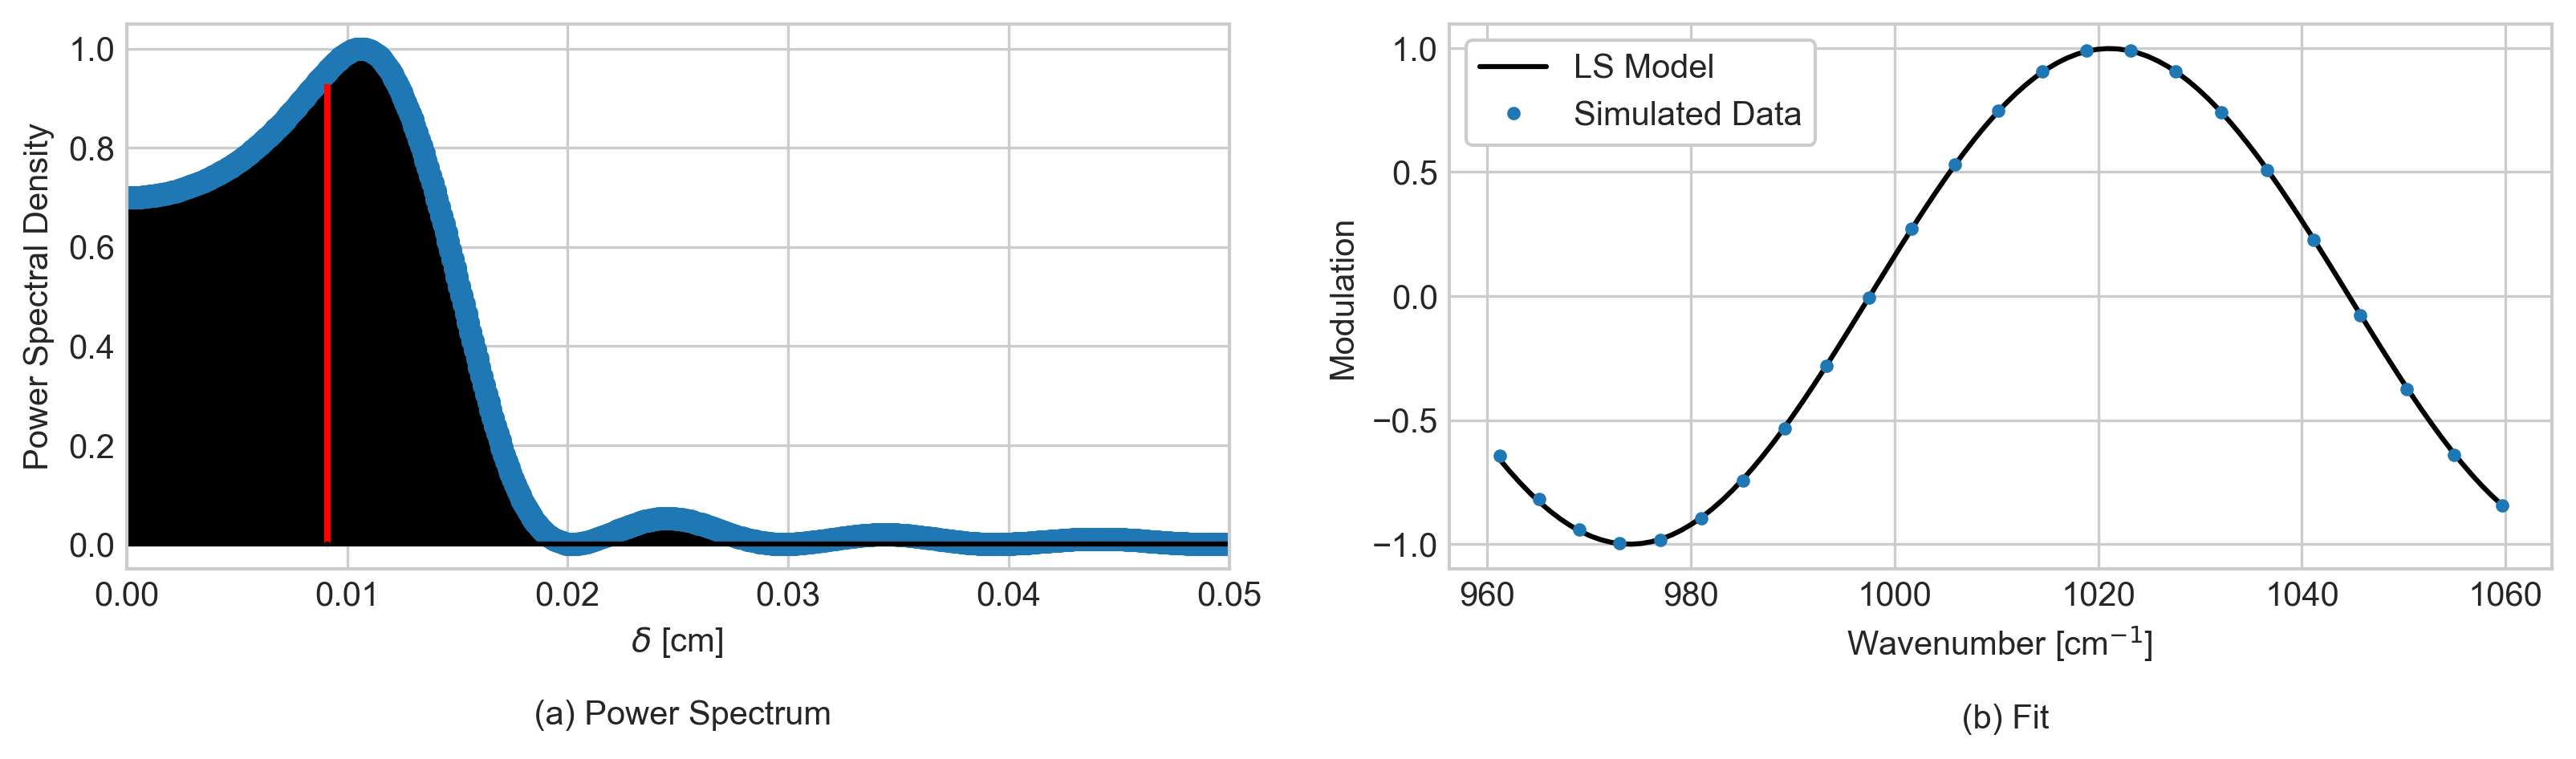

In [36]:
a = 0
j = 56


plt.style.use('seaborn-whitegrid')

print(lambda_c[j])
print('expected retardance ' + str(ret[j]))
start = pixel1[j] #first pixel 
stop  = pixel2[j] #last pixel 
n = stop-start;

x = wav[start:stop] #select mod period
#data = calibration_mod[a] 
#data_err = calibration_modE[a] 

y = model(np.deg2rad(a),start,stop,1)

#y = data[start:stop]
#dy = data_err[start:stop]
#frequency = np.linspace(70,100,100)

ls = LombScargle(x, y)
frequency,power = LombScargle(x, y).autopower(minimum_frequency=ret[j+4],
                                              maximum_frequency=ret[j-4],samples_per_peak=100) #sampling in 1 period intervalsLombScargle(x, y,dy)
frequency_full,power_full = LombScargle(x, y).autopower(samples_per_peak=100) #calculate the full power spectrum



best_frequency = frequency_full[np.argmax(power_full)]
t_fit = np.linspace(x[-1],x[0],100)
y_fit = ls.model(t_fit, frequency_full[np.argmax(power_full)])

prob = ls.false_alarm_probability(power[np.argmax(power)])  
print('False Alarm Probability = ' + str(prob))

[offset,q,u] = ls.model_parameters(best_frequency)
print("best frequency = " + str(best_frequency))
U = u
Q = q
dolp = (((U)**2 +(Q)**2)**0.5)
aolp = 0.5*np.arctan2(U,Q)
print(Q)
print(U)
print('dolp = ' + str(dolp))
if aolp < 0:
    print('aolp = ' + str(np.rad2deg(aolp + np.pi)))# -phase[j])))
else:
    print('aolp = ' + str(np.rad2deg(aolp )))#-phase[j])))


fig, axes = plt.subplots(1,2,figsize=(13, 3))
plt.gcf().set_dpi(300)
axes[0].stem(frequency_full, power_full, 'k',basefmt = 'k')
axes[0].stem(frequency, power, 'r',basefmt = 'k')
axes[0].set_xlim(0,.05)
axes[0].set_xlabel('$\delta$ [cm] \n \n (a) Power Spectrum')
axes[0].set_ylabel('Power Spectral Density')     

axes[1].plot(t_fit,y_fit,'k', label='LS Model')
axes[1].set_xlabel('Wavenumber [cm$^{-1}$] \n \n (b) Fit')
axes[1].set_ylabel('Modulation')
#axes[1].errorbar(x,y,yerr = dy,fmt='.', label='Simulated Data')
axes[1].plot(x,y,'.', label='Simulated Data')

legend = plt.legend(framealpha=1, frameon=True)
legend.get_frame().set_facecolor('w')
plt.show()

In [51]:
def LombFreq(j, data ):
    start = pixel1[j] #first pixel 
    stop  = pixel2[j] #last pixel 
    n = stop-start;

    x = wav[start:stop] #select mod period
    y = model(np.deg2rad(a),start,stop,1)


    ls = LombScargle(x, y)
    frequency,power = LombScargle(x, y).autopower(minimum_frequency=ret[j+4],
                                              maximum_frequency=ret[j-4],samples_per_peak=100)
    frequency_full,power_full = LombScargle(x, y).autopower(samples_per_peak=100) #calculate the full power spectrum

    best_frequency = frequency_full[np.argmax(power_full)]
    
    t_fit = np.linspace(x[-1],x[0],1000)
    y_fit = ls.model(t_fit, best_frequency) #plot on a finer grid
    
    amplitude = (y_fit.max()-y_fit.min())/2
    
    return(best_frequency, amplitude)

In [52]:
efficiency = []

for j in range(0,113):

    powers = np.zeros(360)
    freqs = np.zeros(360)

    for a in range(360):
        data = model(np.deg2rad(a),start,stop,1)
        try:
            f , pwr = LombFreq(j, data)
            powers[a] = pwr
            freqs[a] = f
        except:
            pass

    x = np.linspace(0,2*np.pi,len(angles)) #select mod period
    y = powers
    ls = LombScargle(x, y)
    frequency,power = LombScargle(x, y).autopower(minimum_frequency=.1,
                                                  maximum_frequency=2) #sampling in 1 period intervalsLombScargle(x, y,dy)

    best_frequency = frequency[np.argmax(power)]
    t_fit = np.linspace(x[0],x[-1],360)
    y_fit = ls.model(t_fit, best_frequency)
    efficiency.append(y_fit)

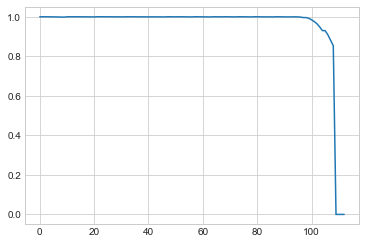

In [54]:
efficiency = np.array(efficiency)
#plt.imshow(efficiency,cmap = 'rainbow')
#plt.show()
eff_ang = t_fit

W = np.mean(efficiency,axis = 1)
plt.plot(W)

In [41]:
carrier = np.zeros(len(lambda_c))
for j in range(len(lambda_c)):
    freqs = np.zeros(360)
    for a in range(360):
        data = model(np.deg2rad(a),start,stop,1)
        try:
            f,p = LombFreq(j, data)
            freqs[a]= f
        except:
            freqs[a] = np.nan
    carrier[j] = np.median(freqs)

C:\Users\khart\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [42]:
def LombModel(a,j,thresh,W):
    start = pixel1[j]
    stop  = pixel2[j]
    n = stop-start;
 
    x = wav[start:stop] 
    y = model(np.deg2rad(a),start,stop,1)

    ls = LombScargle(x, y)
    frequency, power = ls.autopower(minimum_frequency=carrier[j]-.002,maximum_frequency=carrier[j]+.002) #sampling in 1 period intervalsLombScargle(x, y,dy)
    
    prob = ls.false_alarm_probability(power[np.argmax(power)])  
    if prob < thresh:
        [offset,q,u] = ls.model_parameters(carrier[j])
        U = u
        Q = q
        dolp = (((U)**2 +(Q)**2)**0.5)
        aolp = 0.5*np.arctan2(U,Q)
        aolp_corr = aolp
        if dolp > 1:
            [prob,U,Q] =[np.NAN,np.NAN,np.NAN]

    else:
        [prob,U,Q,dolp,aolp] =[np.NAN,np.NAN,np.NAN,np.NAN,np.NAN]
    
    return([dolp,aolp,Q,U,prob,np.NAN])

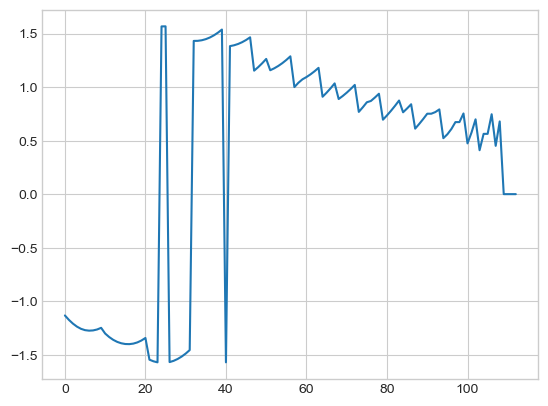

In [19]:
#get offset by finding the retrieved aolp given for an input aolp of zero for each wavelength

offset = []
results = np.zeros([len(lambda_c),360,6]) 
for j in range(len(lambda_c)):
    
    for a in range(0,360):
        try:
            results[j,a] = LombModel(a,j,.1,efficiency)  
        except:
            w =1  
            
phase = results[:,0,1]
plt.plot(phase)

In [20]:
def LombModel(a,j,thresh,W):
    start = pixel1[j]
    stop  = pixel2[j]
    n = stop-start;
 
    x = wav[start:stop] 
    y = model(np.deg2rad(a),start,stop,1)

    ls = LombScargle(x, y)
    frequency, power = ls.autopower(minimum_frequency=carrier[j]-.002,maximum_frequency=carrier[j]+.002) #sampling in 1 period intervalsLombScargle(x, y,dy)
    
    
    prob = ls.false_alarm_probability(power[np.argmax(power)])  
    if prob < thresh:
        [offset,q,u] = ls.model_parameters(carrier[j])
        U = u
        Q = q
        dolp = (((U)**2 +(Q)**2)**0.5)
        aolp = 0.5*np.arctan2(U,Q)
        aolp_corr = aolp - phase[j]
        eff = W[j,a]
        dolp_corr = dolp/eff
        if np.round(dolp,2) > 3:
            [prob,U,Q] =[np.NAN,np.NAN,np.NAN]

    else:
        [prob,U,Q,dolp_corr,aolp_corr] =[np.NAN,np.NAN,np.NAN,np.NAN,np.NAN]
    
    return([dolp_corr,aolp_corr,Q,U,prob])

In [21]:
aolp_cal1 = np.zeros([len(lambda_c),len(angles[:180])])
aolp_corr1 = np.zeros([len(lambda_c),len(angles[:180])])
dolp_cal1 = np.zeros([len(lambda_c),len(angles[:180])])
dolp_error1 =np.zeros([len(lambda_c),len(angles[:180])])
error1 = np.zeros([len(lambda_c),len(angles[:180])])
Q1 = np.zeros([len(lambda_c),len(angles[:180])])
U1 = np.zeros([len(lambda_c),len(angles[:180])])

aolp_cal2 = np.zeros([len(angles[:180])])
aolp_corr2 = np.zeros([len(angles[:180])])
dolp_cal2 = np.zeros([len(angles[:180])])
dolp_error2 = np.zeros([len(angles[:180])])
error2 = np.zeros([len(angles[:180])])
Q2 = np.zeros([len(angles[:180])])
U2 = np.zeros([len(angles[:180])])



for j in range(len(lambda_c)):
    for a in range(180):
        try:
            out = LombModel(a,j,.1,efficiency)  
            aolp_cal1[j,a] = np.rad2deg(out[1])
            if aolp_cal1[j,a] < 0:
                aolp_corr1[j,a] = aolp_cal1[j,a] + 180
            else:
                aolp_corr1[j,a] = aolp_cal1[j,a]
            dolp_cal1[j,a] = out[0]
            dolp_error1[j,a] = (out[0] - 1)
            error1[j,a] =  aolp_corr1[j,a]- angles[a] 
            Q1[j,a] = out[2]
            U1[j,a] = out[3]
        except:
            pass

    


In [22]:
Q_ex = []
U_ex = []
for i in range(180):
    Q_ex.append(np.cos(2*np.deg2rad(i)))
    U_ex.append(np.cos((2*np.deg2rad(i))))

In [47]:
lambda_c[34]

8.722689075630253

Text(0.5, 1.0, 'Q at 8.7 um')

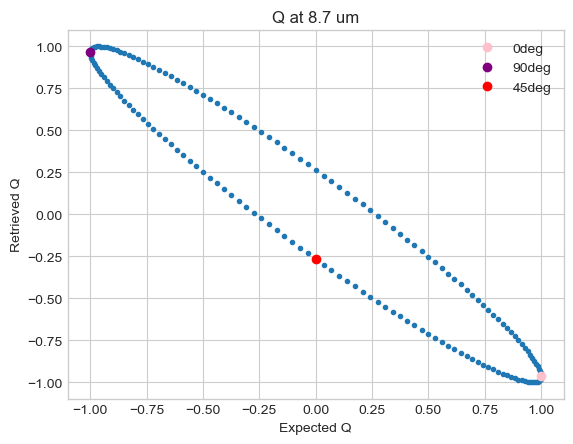

In [61]:
plt.plot(Q_ex,Q1[34,:],'.')
plt.plot(Q_ex[0],Q1[34,0],'o',color='pink',label='0deg')
plt.plot(Q_ex[90],Q1[34,90],'o',color='purple',label='90deg')
plt.plot(Q_ex[45],Q1[34,45],'o',color='red',label='45deg')

plt.legend()
plt.ylabel('Retrieved Q')
plt.xlabel("Expected Q")
plt.title('Q at 8.7 um')

Text(0.5, 1.0, 'U at 8.7 um')

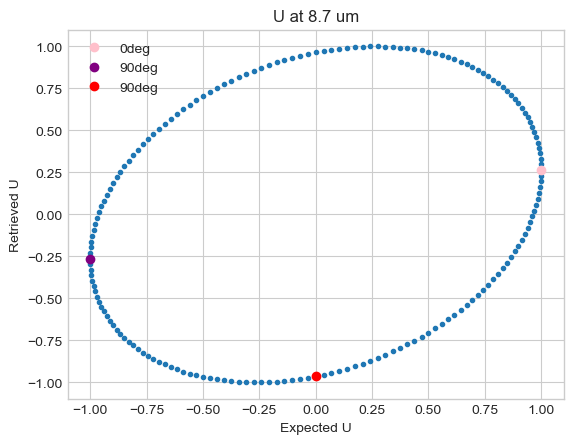

In [62]:
plt.plot(U_ex,U1[34,:],'.')
plt.ylabel('Retrieved U')
plt.xlabel("Expected U")
plt.plot(U_ex[0],U1[34,0],'o',color='pink',label='0deg')
plt.plot(U_ex[90],U1[34,90],'o',color='purple',label='90deg')
plt.plot(U_ex[45],U1[34,45],'o',color='red',label='90deg')

plt.legend()
plt.title('U at 8.7 um')

Text(0, 0.5, 'Retrieved AoLP')

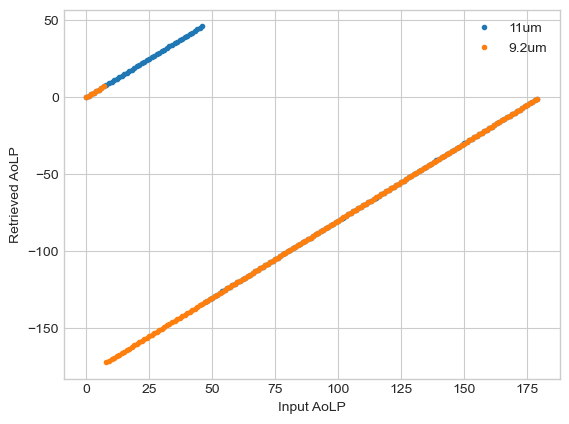

In [30]:
plt.plot(angles[:180],aolp_cal1[90,:],'.',label = '11um')
plt.plot(angles[:180],aolp_cal1[45,:],'.',label = '9.2um')
plt.legend()
plt.xlabel('Input AoLP')
plt.ylabel('Retrieved AoLP')

Text(0, 0.5, 'Difference in Retrieved and Input AoLP')

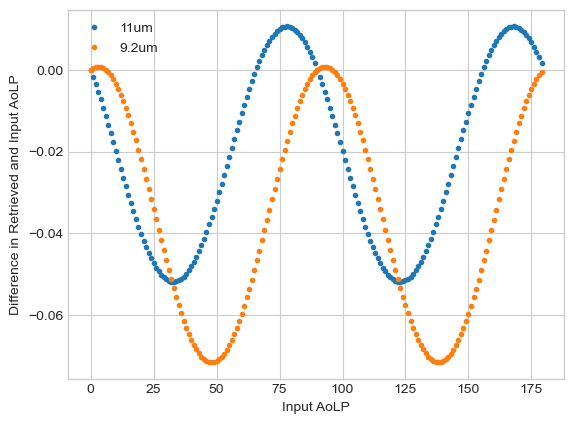

In [31]:
#some periodicity and wavelength dependance 

plt.plot(angles[:180],error1[90,:],'.',label = '11um')
plt.plot(angles[:180],error1[45,:],'.',label = '9.2um')
plt.legend()
plt.xlabel('Input AoLP')
plt.ylabel('Difference in Retrieved and Input AoLP')

Text(0, 0.5, 'Retrieved DoLP')

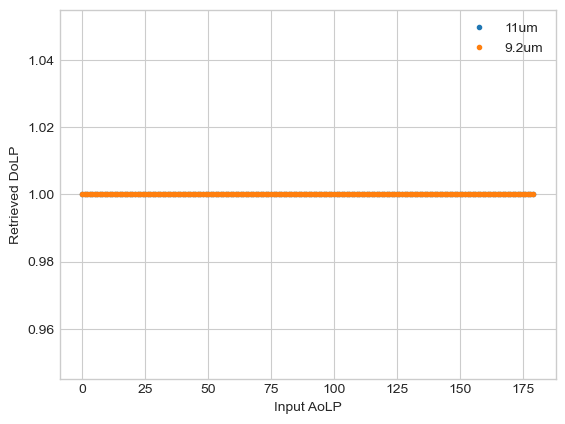

In [32]:
plt.plot(angles[:180],np.round(dolp_cal1[90,:],2),'.',label = '11um')
plt.plot(angles[:180],np.round(dolp_cal1[45,:],2),'.',label = '9.2um')
plt.legend()
plt.xlabel('Input AoLP')
plt.ylabel('Retrieved DoLP')